In [1]:
# set up dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from scipy.stats import linregress
from pprint import pprint
import datetime as dt

# read in google play store csv data
GplayStore_csv_path = "Resources/Google-Playstore-Full.csv"

df = pd.read_csv(GplayStore_csv_path)
df

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2,3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267047,Community Healthplex,HEALTH_AND_FITNESS,5,1,100+,4.2M,0,Everyone,27-Jul-18,5.0 and up,1.0.4.228,NaN,NaN,NaN,NaN
267048,Pet ads: Buy & Sell,BUSINESS,2.6,5,500+,8.4M,0,Everyone,22-Oct-18,4.0.3 and up,1.8,NaN,NaN,NaN,NaN
267049,Collectors Market: Buy & Sell,BUSINESS,3.28571,7,"1,000+",7.9M,0,Everyone,13-Mar-19,4.0.3 and up,2.4,NaN,NaN,NaN,NaN
267050,"Car Market, Buy & Sell",BUSINESS,5,1,"1,000+",8.2M,0,Everyone,27-Aug-18,4.0.3 and up,1.7,NaN,NaN,NaN,NaN


In [2]:
df.count()

App Name           267051
Category           267051
Rating             267052
Reviews            267051
Installs           267052
Size               267052
Price              267052
Content Rating     267052
Last Updated       267052
Minimum Version    267051
Latest Version     267049
Unnamed: 11            18
Unnamed: 12             3
Unnamed: 13             2
Unnamed: 14             1
dtype: int64

In [3]:
df["Category"].value_counts(100)

EDUCATION                          0.125047
TOOLS                              0.080853
BOOKS_AND_REFERENCE                0.080048
ENTERTAINMENT                      0.077154
MUSIC_AND_AUDIO                    0.066939
                                     ...   
 Accounting                        0.000004
6                                  0.000004
)                                  0.000004
 Alfabe �?ren                      0.000004
 Romantic Song Music Love Songs    0.000004
Name: Category, Length: 67, dtype: float64

In [4]:
#simple_df = df.loc[df["Category"] == "GAME_ACTION"]
simple_df = df[(df['Category'] == "GAME_ACTION") | (df['Category'] == "GAME_ACTION") | (df['Category'] == "GAME_ADVENTURE") | (df['Category'] == "GAME_ARCADE") | (df['Category'] == "GAME_BOARD") | (df['Category'] == "GAME_CARD") | (df['Category'] == "GAME_CASINO") | (df['Category'] == "GAME_CASUAL") | (df['Category'] == "GAME_EDUCATIONAL") | (df['Category'] == "GAME_MUSIC") | (df['Category'] == "GAME_PUZZLE") | (df['Category'] == "GAME_RACING") | (df['Category'] == "GAME_ROLE_PLAYING") | (df['Category'] == "GAME_SIMULATION") | (df['Category'] == "GAME_SPORTS") | (df['Category'] == "GAME_STRATEGY") | (df['Category'] == "GAME_TRIVIA") | (df['Category'] == "GAME_WORD")]
simple_df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
46,King of Crabs,GAME_ACTION,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN
47,Match 3 App Rewards: Daily Game Rewards,GAME_CASUAL,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN
48,Brown Dust,GAME_ROLE_PLAYING,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN
49,Poly - Coloring Puzzle Art Book,GAME_PUZZLE,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN
50,Legend of Empress,GAME_ROLE_PLAYING,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN


In [5]:
split_simple_df = simple_df['Category'].str.split('_', n=1,expand=True).rename(columns ={0:'Category', 1:'Sub Category'})
split_simple_df

,Category,Sub Category
46,GAME,ACTION
47,GAME,CASUAL
48,GAME,ROLE_PLAYING
49,GAME,PUZZLE
50,GAME,ROLE_PLAYING
...,...,...
266973,GAME,WORD
266995,GAME,ADVENTURE
267014,GAME,SIMULATION
267024,GAME,ARCADE


In [6]:
simple_df[['Category', 'Sub Category']] = simple_df['Category'].str.split('_', n=1,expand=True)
simple_df

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Sub Category
46,King of Crabs,GAME,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN,ACTION
47,Match 3 App Rewards: Daily Game Rewards,GAME,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN,CASUAL
48,Brown Dust,GAME,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN,ROLE_PLAYING
49,Poly - Coloring Puzzle Art Book,GAME,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN,PUZZLE
50,Legend of Empress,GAME,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN,ROLE_PLAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266973,WordDeck,GAME,4.5,8,"1,000+",4.3M,0,Everyone,14-Sep-18,4.0 and up,1.1.1,NaN,NaN,NaN,NaN,WORD
266995,Head 'n' Trails : Finger dodge,GAME,4.35294,34,500+,Varies with device,0,Everyone,3-Jun-17,Varies with device,Varies with device,NaN,NaN,NaN,NaN,ADVENTURE
267014,3D Earth Airplane Flying,GAME,3.21429,14,"1,000+",66M,0,Everyone,16-Jan-18,7.0 and up,1.0.7,NaN,NaN,NaN,NaN,SIMULATION
267024,Bricks Breakout,GAME,4.4,5,100+,2.4M,0,Everyone,2-Nov-16,3.2 and up,1.1,NaN,NaN,NaN,NaN,ARCADE


In [7]:
NewOrder = ['App Name', 'Category', 'Sub Category','Rating','Reviews','Installs','Size','Price','Content Rating','Last Updated','Minimum Version','Latest Version','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14']

In [8]:
simple_df = simple_df[NewOrder]
simple_df.head(5)

,App Name,Category,Sub Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN


In [9]:
simple_df_update = simple_df.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Size', 'Minimum Version', 'Latest Version'], axis=1)
simple_df_update.head()

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",0,Everyone 10+,7-Mar-19
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",0,Everyone,20-Feb-19
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",0,Teen,1-Apr-19
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",0,Everyone,28-Mar-19
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",0,Teen,30-Mar-19


In [10]:
simple_df_update.to_csv('sample.csv')

In [11]:
simple_df_update.dtypes

App Name          object
Category          object
Sub Category      object
Rating            object
Reviews           object
Installs          object
Price             object
Content Rating    object
Last Updated      object
dtype: object

In [12]:
simple_df_update['Price'] = simple_df_update['Price'].str.replace('$', '')
simple_df_update['Rating'] = simple_df_update['Rating'].astype(str)

simple_df_update

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",0,Everyone 10+,7-Mar-19
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",0,Everyone,20-Feb-19
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",0,Teen,1-Apr-19
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",0,Everyone,28-Mar-19
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",0,Teen,30-Mar-19
...,...,...,...,...,...,...,...,...,...
266973,WordDeck,GAME,WORD,4.5,8,"1,000+",0,Everyone,14-Sep-18
266995,Head 'n' Trails : Finger dodge,GAME,ADVENTURE,4.352941036,34,500+,0,Everyone,3-Jun-17
267014,3D Earth Airplane Flying,GAME,SIMULATION,3.214285612,14,"1,000+",0,Everyone,16-Jan-18
267024,Bricks Breakout,GAME,ARCADE,4.400000095,5,100+,0,Everyone,2-Nov-16


In [13]:
simple_df_update.to_csv('Resources/sample.csv', index = False)

In [14]:
new_csv = "Resources/sample.csv"

game_df = pd.read_csv(new_csv)
game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
0,King of Crabs,GAME,ACTION,3.280255,785.0,"500,000+",0.0,Everyone 10+,7-Mar-19
1,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161,248.0,"10,000+",0.0,Everyone,20-Feb-19
2,Brown Dust,GAME,ROLE_PLAYING,4.476288,70260.0,"1,000,000+",0.0,Teen,1-Apr-19
3,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865,878.0,"10,000+",0.0,Everyone,28-Mar-19
4,Legend of Empress,GAME,ROLE_PLAYING,3.820000,750.0,"50,000+",0.0,Teen,30-Mar-19
...,...,...,...,...,...,...,...,...,...
22503,WordDeck,GAME,WORD,4.500000,8.0,"1,000+",0.0,Everyone,14-Sep-18
22504,Head 'n' Trails : Finger dodge,GAME,ADVENTURE,4.352941,34.0,500+,0.0,Everyone,3-Jun-17
22505,3D Earth Airplane Flying,GAME,SIMULATION,3.214286,14.0,"1,000+",0.0,Everyone,16-Jan-18
22506,Bricks Breakout,GAME,ARCADE,4.400000,5.0,100+,0.0,Everyone,2-Nov-16


In [15]:
simple_df_update['Price'].value_counts()

0         19586
0.99        610
2.99        512
1.99        494
4.99        390
          ...  
3.22          1
2.29          1
4.41          1
59.99         1
3.41          1
Name: Price, Length: 105, dtype: int64

## Price vs Rating

In [16]:
#Identify Outlier
outlier_game_df = game_df.loc[game_df['Price']>= 100]
outlier_game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
630,Plasma duct - Premium Game,GAME,PUZZLE,3.378378,74.0,"1,000+",399.99,Everyone,4-Mar-19


In [17]:
game_df = game_df.loc[game_df['Price'] <= 100]
#dropped $400 app price as an outlier

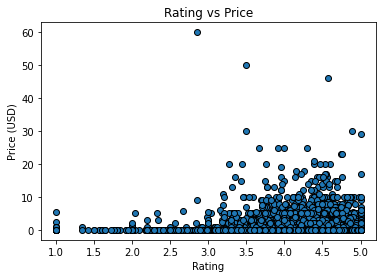

In [18]:
plt.scatter(game_df['Rating'], game_df['Price'], edgecolor = 'k')
plt.xlabel("Rating")
plt.ylabel("Price (USD)")
plt.title("Rating vs Price")

# Save the figure
plt.savefig("Resources/Price vs Rating_Scatter.png")

plt.show()


In [19]:
#####game_df.plot.scatter(x = 'Rating', y = 'Price', edgecolor = 'k')

The r-value is: 0.026622154159876222


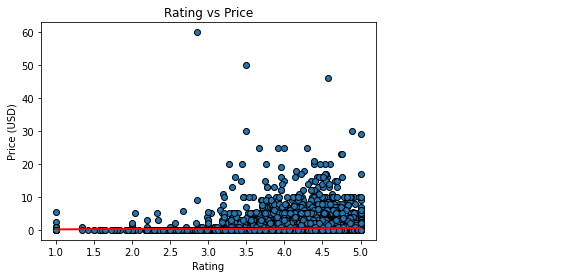

In [20]:
#Is there a correlation between game price and rating?

x_values = game_df['Rating']
y_values = game_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = 'k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rating')
plt.ylabel('Price (USD)')
plt.title("Rating vs Price")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Rating_Linregress.png")

plt.show()

In [21]:
rating = game_df.iloc[:, 3]
price = game_df.iloc[:,6]
correlation = st.pearsonr(rating, price)
print (f'The correlation between both factors is {round(correlation[0],2)}')

The correlation between both factors is 0.03


## Installs and Game Price

In [22]:
game_df['Installs'] = game_df['Installs'].str.replace('+', '')
game_df['Installs'] = game_df['Installs'].str.replace(',', '')
#game_df['Installs'] = game_df['Installs'].astype(int)

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
game_df['Installs'].value_counts()

100000        3587
1000000       3372
10000         3068
1000          2342
500000        1632
50000         1399
100           1380
5000          1247
10000000      1241
5000000       1099
500            813
10             513
50             404
50000000       178
100000000       90
5               78
1               52
500000000        6
0                5
1000000000       1
Name: Installs, dtype: int64

In [24]:
game_df['Installs'] = game_df['Installs'].astype(int)

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
game_df = game_df.sort_values(by = ['Installs'], ascending = True)
game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
18331,RC Bot,GAME,EDUCATIONAL,3.000000,4.0,0,0.0,Everyone,1-Nov-18
8052,Vadaa Hunt,GAME,CASUAL,2.333333,3.0,0,0.0,Everyone,5-Dec-18
6052,Bubble Shooter,GAME,PUZZLE,4.130435,23.0,0,0.0,Everyone,23-Oct-18
15231,4 Only Jotto: The 4 Letter Logic Word Game,GAME,WORD,5.000000,1.0,0,0.0,Everyone,20-Jan-19
14698,Best Air Hunter,GAME,ACTION,5.000000,24.0,0,0.0,Everyone,6-Mar-19
...,...,...,...,...,...,...,...,...,...
566,Temple Run 2,GAME,ACTION,4.329189,8612822.0,500000000,0.0,Everyone,27-Mar-19
403,Pou,GAME,CASUAL,4.330340,10752323.0,500000000,0.0,Everyone,25-May-18
949,Hill Climb Racing,GAME,RACING,4.440125,9257863.0,500000000,0.0,Everyone,19-Mar-19
658,My Talking Tom,GAME,CASUAL,4.491666,15569249.0,500000000,0.0,Everyone,2-Apr-19


In [26]:
game_df['Installs'] = game_df['Installs'].astype(str)

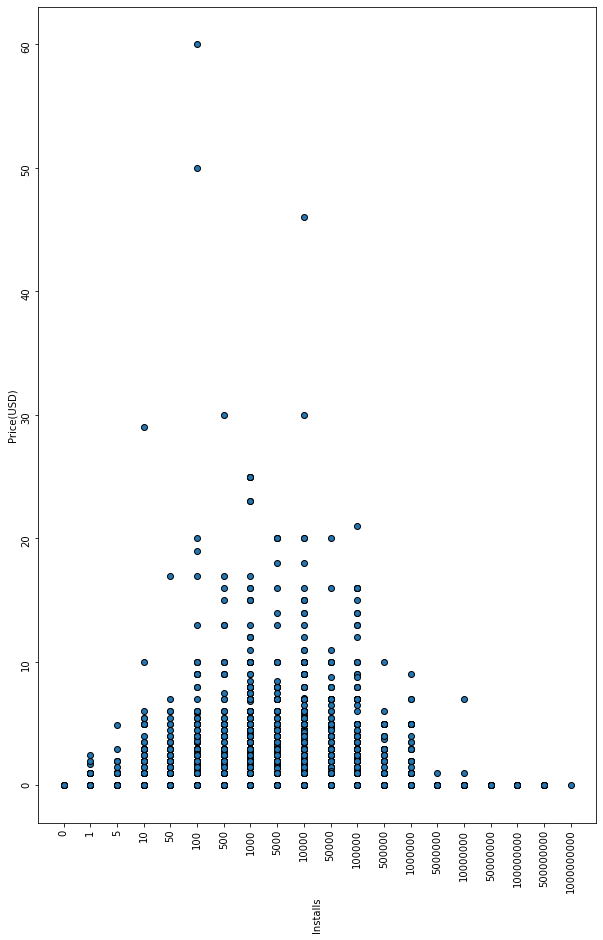

In [36]:
plt.figure(figsize = (10,15))
plt.scatter(game_df['Installs'], game_df['Price'], edgecolor = 'k')
plt.xlabel("Installs", rotation=90)
plt.ylabel("Price (USD)")
#plt.title("Installs vs Price", rotation=90)
plt.xticks(rotation=90) 
plt.yticks(rotation=90)
h = plt.ylabel('Price(USD)')

# Save the figure
plt.savefig("Resources/Price vs Installs_Scatter_hor.png")

plt.show()

In [ ]:
game_df['Installs'] = game_df['Installs'].astype(int)

In [ ]:
#dropping outliers for linear regression
game_outliers = game_df.loc[game_df['Installs'] >= 400000000]
game_outliers
#top 6 games with the most installs

In [ ]:
game_df['Installs'] = game_df['Installs'].astype(int)

In [ ]:
game_installs = game_df.loc[game_df['Installs'] <= 400000000]

In [ ]:
game_installs['Installs'] = game_installs['Installs'].astype(str)
game_installs

In [ ]:
game_installs['Price'].value_counts()

In [ ]:
x_values = game_installs['Installs'].astype('int64')
y_values = game_installs['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = 'k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000000,10),fontsize=15,color="red")
plt.xlabel('Installs per 100 Million')
plt.ylabel('Price (USD)')
plt.title("Installs vs Price")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Installs_Linregress.png")

plt.show()

## Since there is an obvious correlation between the amount of installs and free gaming apps, let's take a look at just the paid gaming apps and the correlation between the installs as the price increases

In [ ]:
game_df['Price'] = game_df['Price'].astype(float)

In [ ]:
free_games_df = game_df.loc[(game_df["Price"]!= 0.00) & (game_df['Price']!= 0) & (game_df['Price']!= 0.0)]

free_games_df

In [ ]:
free_games_df['Price'].value_counts()

In [ ]:
x_values = free_games_df['Installs'].astype('int64')
y_values = free_games_df['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = 'k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000000,10),fontsize=15,color="red")
plt.xlabel('Installs per 10 Million')
plt.ylabel('Price (USD)')
plt.title("Price vs Installs on Paid Games Only")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Installs_Paid Games_Linregress.png")

plt.show()

## and to make the correlation even more apparent

In [ ]:
lessthan_twenty = game_df.loc[game_df['Price'] >= 20.00]

In [ ]:
x_values = lessthan_twenty['Installs'].astype('int64')
y_values = lessthan_twenty['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = 'k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Installs')
plt.ylabel('Price (USD)')
plt.title("Price vs Installs on Games Over $20")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Installs_Games Over $20_Linregress.png")

plt.show()

## Average reviews per category

In [ ]:
action_reviews = free_games_df[free_games_df["Sub Category"]=="ACTION"][["Reviews"]].mean(0)
print(action_reviews.astype(int).round(0))
adventure_reviews = free_games_df[free_games_df["Sub Category"]=="ADVENTURE"][["Reviews"]].mean(0)
print(adventure_reviews.astype(int).round(0))
arcade_reviews = free_games_df[free_games_df["Sub Category"]=="ARCADE"][["Reviews"]].mean(0)
print(arcade_reviews.astype(int).round(0))
board_reviews = free_games_df[free_games_df["Sub Category"]=="BOARD"][["Reviews"]].mean(0)
print(board_reviews.astype(int).round(0))
card_reviews = free_games_df[free_games_df["Sub Category"]=="CARD"][["Reviews"]].mean(0)
print(card_reviews.astype(int).round(0))
casino_reviews = free_games_df[free_games_df["Sub Category"]=="CASINO"][["Reviews"]].mean(0)
print(casino_reviews.astype(int).round(0))
casual_reviews = free_games_df[free_games_df["Sub Category"]=="CASUAL"][["Reviews"]].mean(0)
print(casual_reviews.astype(int).round(0))
educational_reviews = free_games_df[free_games_df["Sub Category"]=="EDUCATIONAL"][["Reviews"]].mean(0)
print(educational_reviews.astype(int).round(0))
music_reviews = free_games_df[free_games_df["Sub Category"]=="MUSIC"][["Reviews"]].mean(0)
print(music_reviews.astype(int).round(0))
puzzle_reviews = free_games_df[free_games_df["Sub Category"]=="PUZZLE"][["Reviews"]].mean(0)
print(puzzle_reviews.astype(int).round(0))
racing_reviews = free_games_df[free_games_df["Sub Category"]=="RACING"][["Reviews"]].mean(0)
print(racing_reviews.astype(int).round(0))
role_playing_reviews = free_games_df[free_games_df["Sub Category"]=="ROLE_PLAYING"][["Reviews"]].mean(0)
print(role_playing_reviews.astype(int).round(0))
simulation_reviews = free_games_df[free_games_df["Sub Category"]=="SIMULATION"][["Reviews"]].mean(0)
print(simulation_reviews.astype(int).round(0))
sports_reviews = free_games_df[free_games_df["Sub Category"]=="SPORTS"][["Reviews"]].mean(0)
print(sports_reviews.astype(int).round(0))
strategy_reviews = free_games_df[free_games_df["Sub Category"]=="STRATEGY"][["Reviews"]].mean(0)
print(strategy_reviews.astype(int).round(0))
trivia_reviews = free_games_df[free_games_df["Sub Category"]=="TRIVIA"][["Reviews"]].mean(0)
print(trivia_reviews.astype(int).round(0))
word_reviews = free_games_df[free_games_df["Sub Category"]=="WORD"][["Reviews"]].mean(0)
print(word_reviews.astype(int).round(0))

In [ ]:
plt.figure(figsize = (10,15))
data = {"Reviews":["Action", "Adventure", "Arcade", "Board", "Card", "Casino", "Casual", "Educational", "Music", "Puzzle", "Racing", "Role Playing", "Simaulation", "Sports", "Strategy", "Trivia", "Word"],
        "Average":[15038,3530,17146,1433,5433,150,1734,453,1831,5267,6394,4005,3602,3318,5598,5367,6891]
        };
RdataFrame = pd.DataFrame(data=data);
RdataFrame.plot.bar(x="Reviews", y="Average", rot=70, title="Average Number of Reviews by Sub Category")

plt.tight_layout()

# Save the figure
plt.savefig("Resources/Average Number of Reviews by Sub Category.png")

plt.show()


## is there a correlation between the upfront price of the app and the date it was most recently updated

In [ ]:
import calendar

In [ ]:
date_price = game_df[['Last Updated','Price']]
date_price

In [ ]:
#{month: index for index, month in enumerate(calendar.month_abbr) if month}

In [ ]:
split_date_df = date_price['Last Updated'].str.split('-', n=2,expand=True).rename(columns ={0:'Day', 1:'Month', 2: 'Year'})
split_date_df

In [ ]:
date_price[['Day', 'Month', 'Year']] = date_price['Last Updated'].str.split('-', n=2,expand=True)
date_price                                                         

In [ ]:
d = {month: index for index, month in enumerate(calendar.month_abbr) if month}

date_price.Month = date_price.Month.map(d)

date_price

In [ ]:
date_price['year'] = pd.to_numeric(date_price['Year']) +2000
date_price['year'].value_counts()

In [ ]:
#date_price['Year'] = date_price['Year'].astype(str)
#date_price['Month'] = date_price['Month'].astype(str)

In [ ]:
date_price['full_date'] = pd.to_datetime(date_price[['year', 'Month', 'Day']])

In [ ]:
date_price['fd_numeric']=date_price['full_date'].map(dt.datetime.toordinal)

In [ ]:
date_price.sort_values(by = 'full_date')

In [ ]:
#tick_one = date_price.loc[(date_price["fd_numeric"] > 737500) & (date_price['fd_numeric'] < 736502)]
#lessthan_twenty = game_df.loc[game_df['Price'] >= 20.00]
#free_games_df = game_df.loc[(game_df["Price"]!= 0.00) & (game_df['Price']!= 0) & (game_df['Price']!= 0.0)]
date_price.tail()

In [ ]:
x_values = date_price['fd_numeric']
y_values = date_price['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = 'k')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks([733500, 734500, 735500, 736500, 737500], [' Feb 2009', 'Oct 2011', 'Sep 2014', 'Jun 2017', 'Apr 2019'])
plt.title("Price vs Last Updated")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Last Updated_Linregress.png")
plt.show()


In [ ]:
installs_rating = game_df[["Installs", "Content Rating"]]
installs_rating

## Average Installs by Rating

In [ ]:
pandas_bar_points = game_df.groupby(["Content Rating"])["Installs"].mean()
pandas_bar_points.plot(kind = "bar", figsize= (10,5))

#set axis titles
plt.title("Average Installs by Rating")
plt.xlabel("Content Rating")
plt.ylabel("Average Number of Installs (per Million)")

plt.tight_layout()
# Save the figure
plt.savefig("Resources/Average Installs by Rating.png")


#display chart 
plt.show()

## Merging in Apple data for comparison

In [ ]:
# read in apple app store csv data
appstore_csv_path = "Resources/appstore_games.csv"

apple_df = pd.read_csv(appstore_csv_path)
apple_df.head()

In [ ]:
apple_df_update = apple_df.drop(columns=['URL','ID','Subtitle','Icon URL', 'In-app Purchases', 'Description','Developer','Age Rating','Languages','Size','Primary Genre','Genres','Original Release Date','Current Version Release Date'], axis=1)
apple_df_update.head()

In [ ]:
combined_game = pd.merge(game_df, apple_df_update, left_on='App Name', right_on='Name')
combined_game

In [ ]:
combined_game = combined_game.drop(columns=['Category','Sub Category','Installs','Content Rating','Last Updated','Name'], axis=1)
combined_game.head()

In [ ]:
combined_game = combined_game.rename(columns={'Rating': 'Google Rating', 'Reviews': 'Google Reviews','Price_x':'Google Price','Average User Rating':'Apple Rating','User Rating Count':'Apple Reviews','Price_y':'Apple Price'})
combined_game

In [ ]:
combined_game_clean = combined_game.dropna()
combined_game_clean.tail()

In [ ]:
duplicated_game = combined_game_clean.loc[combined_game_clean.duplicated(subset = ["App Name"]), "App Name"].unique()
duplicated_game

In [ ]:
optional_df = combined_game_clean.loc[combined_game_clean["App Name"]=="Reversi"]
optional_df

In [ ]:
clean_df = combined_game_clean.loc[combined_game_clean["App Name"]!='Gnomes Garden: Christmas story']
clean_df = clean_df.loc[clean_df["App Name"]!='Checkers']
clean_df = clean_df.loc[clean_df["App Name"]!='Lotus Digital']
clean_df = clean_df.loc[clean_df["App Name"]!='Spider Solitaire']
clean_df = clean_df.loc[clean_df["App Name"]!='Zombie Ground .io']
clean_df = clean_df.loc[clean_df["App Name"]!='Mini Metro']
clean_df = clean_df.loc[clean_df["App Name"]!='Alien Path']
clean_df = clean_df.loc[clean_df["App Name"]!='Micro Golf Masters']
clean_df = clean_df.loc[clean_df["App Name"]!='Crafting Idle Clicker']
clean_df = clean_df.loc[clean_df["App Name"]!='Happy Chef 2']
clean_df = clean_df.loc[clean_df["App Name"]!='Craft Warriors']
clean_df = clean_df.loc[clean_df["App Name"]!='Stick War: Legacy']
clean_df = clean_df.loc[clean_df["App Name"]!='Sudoku']
clean_df = clean_df.loc[clean_df["App Name"]!='Reversi']
clean_df = clean_df.loc[clean_df["App Name"]!='Solitaire']
clean_df = clean_df.loc[clean_df["App Name"]!='Pinochle']
clean_df = clean_df.loc[clean_df["App Name"]!='Chess']
clean_df = clean_df.loc[clean_df["App Name"]!='Mancala']
clean_df = clean_df.loc[clean_df["App Name"]!='Forty Thieves Solitaire']
clean_df = clean_df.loc[clean_df["App Name"]!='FreeCell']
clean_df = clean_df.loc[clean_df["App Name"]!='Solitaire Classic']
clean_df = clean_df.loc[clean_df["App Name"]!='Reversi Free']
clean_df = clean_df.loc[clean_df["App Name"]!='Bubble Shooter Classic']
clean_df = clean_df.loc[clean_df["App Name"]!='Alien Path']
#clean_df = clean_df.loc[clean_df["App Name"]!='Brain Games']
combined_games_clean = clean_df.loc[clean_df["App Name"]!= 'Brain Games']
combined_games_clean

In [ ]:
apl_price = combined_games_clean['Apple Price'].sum()
googl_price = combined_games_clean['Google Price'].sum()
index = ['Total Cost of (equivalent) Gaming Apps']
df = pd.DataFrame({'Apple Price': apl_price,
                   'Google Price': googl_price}, index = index)
ax = df.plot.bar(rot=0)

plt.savefig("Resources/Apple vs Google Total Price.png")

## Let's see the price difference in the games where the price is not the same on both platforms

In [ ]:
combined_game_price_diff = combined_games_clean.loc[combined_games_clean["Apple Price"]!= combined_games_clean["Google Price"]]
combined_game_price_diff

## Now let's see the difference in the cost of games by platform and on average how much more the most expensive platform is charging

In [ ]:
apl_price = combined_game_price_diff['Apple Price'].mean()
googl_price = combined_game_price_diff['Google Price'].mean()
index = ['Average Difference in Cost by Platform']
df = pd.DataFrame({'Apple Price': apl_price,
                   'Google Price': googl_price}, index = index)
ax = df.plot.bar(rot=0)


diff_mean = round(round(combined_game_price_diff['Apple Price'].mean(),2) - round(combined_game_price_diff['Google Price'].mean(),2),2)

print(f"On average, a customer will pay ${diff_mean} more for a gaming app in the Apple Store vs the Google Play Store")

plt.savefig("Resources/Average Difference in Cost.png")

## Cool, are games more likely to be reviewed in the Google Play Store or in the Apple app store?

In [ ]:
combined_game_review_diff = combined_games_clean.loc[combined_games_clean["Apple Reviews"]!= combined_games_clean["Google Reviews"]]
combined_game_review_diff

In [ ]:
#sum of reviews between apple store and google play store apps
apl_review = combined_game_review_diff['Apple Reviews'].sum()
googl_review = combined_game_review_diff['Google Reviews'].sum()
index = ['Total Number of Reviews per 100 Million']
df = pd.DataFrame({'Apple Reviews': apl_review,
                   'Google Reviews': googl_review}, index = index)
ax = df.plot.bar(rot=0)

plt.savefig("Resources/Total Number of Reviews.png")

In [ ]:
apl_review = combined_game_review_diff['Apple Reviews'].mean()
googl_review = combined_game_review_diff['Google Reviews'].mean()
index = ['Average Number of Reviews']
df = pd.DataFrame({'Apple Reviews': apl_review,
                   'Google Reviews': googl_review}, index = index)
ax = df.plot.bar(rot=0)


diff_review_mean = round(combined_game_review_diff['Google Reviews'].mean(),2) - round(combined_game_review_diff['Apple Reviews'].mean(),2)

print(f"On average, a gaming app in the Google Play Store will have {diff_review_mean} more reviews than an app in the Apple app store")

plt.savefig("Resources/Average Number of Reviews.png")

## Are the average ratings higher on Apple or Google?

In [ ]:
apl_rate = combined_games_clean['Apple Rating'].mean()
googl_rate = combined_games_clean['Google Rating'].mean()
index = ['Average Gaming App Rating']
df = pd.DataFrame({'Apple Ratings': apl_rate,
                   'Google Ratings': googl_rate}, index = index)
ax = df.plot.bar(rot=0)


diff_rate_mean = round(combined_games_clean['Google Rating'].mean(),2) - round(combined_games_clean['Apple Rating'].mean(),2)

print(f"On average gaming apps in the Google Play Store are rated fairly similarly to gaming apps in the Apple app store")

plt.savefig("Resources/Average Rating.png")